In [ ]:
# check pytorch is installed properly
[YOUR CODE]

2.9.0+cpu


In [ ]:
# check runtime type
[YOUR CODE]

False


### Three components of pyTorch

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/1.webp" width="400px">

### Tensor is just a fancy name of matrix, but with optimized performance for AI

Why not just use python list?

https://medium.com/operations-research-bit/computational-power-measuring-python-list-vs-pytorch-tensor-57cef1efe9af

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/6.webp" width="400px">

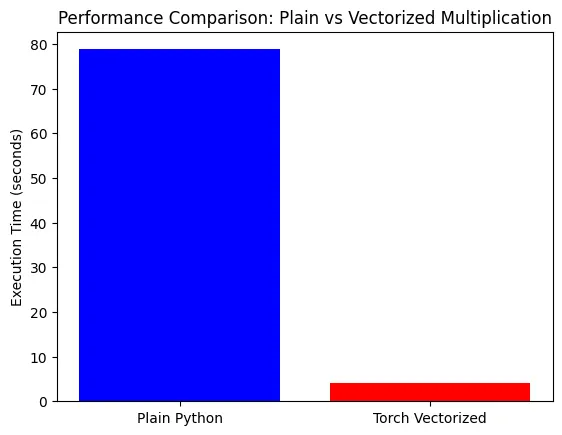

### Scalars, vectors, matrices, and tensors

In [ ]:
import torch
import numpy as np

# create a 0D tensor (scalar) from a Python integer
tensor0d = [YOUR CODE]

# create a 1D tensor (vector) from a Python list
tensor1d = [YOUR CODE]

# create a 2D tensor from a nested Python list
tensor2d = [YOUR CODE]

# create a 3D tensor from a nested Python list
tensor3d_1 = [YOUR CODE]

# create a 3D tensor from NumPy array
ary3d = np.array([[[1, 2], [3, 4]],
                  [[5, 6], [7, 8]]])
# Method 1: Copies NumPy array
tensor3d_2 = [YOUR CODE]

# Method 2: Shares memory with NumPy array
tensor3d_3 = [YOUR CODE]

### difference between `.tensor()` vs `.from_numpy()`

In [ ]:
# modify the value of the [0,0,0] element to 999
[YOUR CODE]

# check content of tensor3d_2, it should remain unchanged
[YOUR CODE]

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [ ]:
# check the content of tensor3d_3, it should have changed because of memory sharing.
[YOUR CODE]

tensor([[[999,   2],
         [  3,   4]],

        [[  5,   6],
         [  7,   8]]])


### Tensor data types

Why do we care? It impacts the model's memory size, accuracy and performance.

In [ ]:
tensor1d = torch.tensor([1, 2, 3])

# display the data type:
[YOUR CODE]

torch.int64


In [ ]:
floatvec = torch.tensor([1.0, 2.0, 3.0])

# display the data type:
[YOUR CODE]

torch.float32


In [ ]:
# convert tensor1d from int64 to float32
floatvec = [YOUR CODE]

# display the data type:
[YOUR CODE]

torch.float32


### Reshape tensor and Difference between `view()` vs `reshape()`

Both `view()` and `reshape()` in PyTorch are used to change the shape of a tensor. However, there's a crucial difference in how they operate, primarily related to memory contiguity:

*   `view()`: shared memory with the original tensor. The original tensor's memory must be **contiguous**.
*   `reshape()`:
    * if the original tensor's memory is contiguous, `reshape()` will share memory just like `view()`.
    * otherwise, `reshape()` will create a **copy** of the data to make it contiguous before reshaping.

Therefore, `view()` is faster when applicable, but `reshape()` is more rebust with possible performance overhead.

In [ ]:
tensor2d = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# check its shape
[YOUR CODE]

torch.Size([2, 3])

In [ ]:
# use reshape to convert from 2x3 to 3x2 tensor

tensor2d_reshape = [YOUR CODE]
tensor2d_reshape

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
# use view() to convert from 2x3 to 3x2 tensor

tensor2d_view = [YOUR CODE]
tensor2d_view

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
tensor2d

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
# modify the [0,0] element in tensor2d_view to 999

[YOUR CODE]
tensor2d_view

tensor([[999,   2],
        [  3,   4],
        [  5,   6]])

In [ ]:
# now check the content of the original tensor2d, its [0,0] element should also be updated.

tensor2d

tensor([[999,   2,   3],
        [  4,   5,   6]])

In [ ]:
# should tensor2d_reshape also be updated? It shares memory in this case.

tensor2d_reshape

tensor([[999,   2],
        [  3,   4],
        [  5,   6]])

### Transpose operation `.T` breaks contiguous momery layout.

You can use `is_contiguous()` to check.

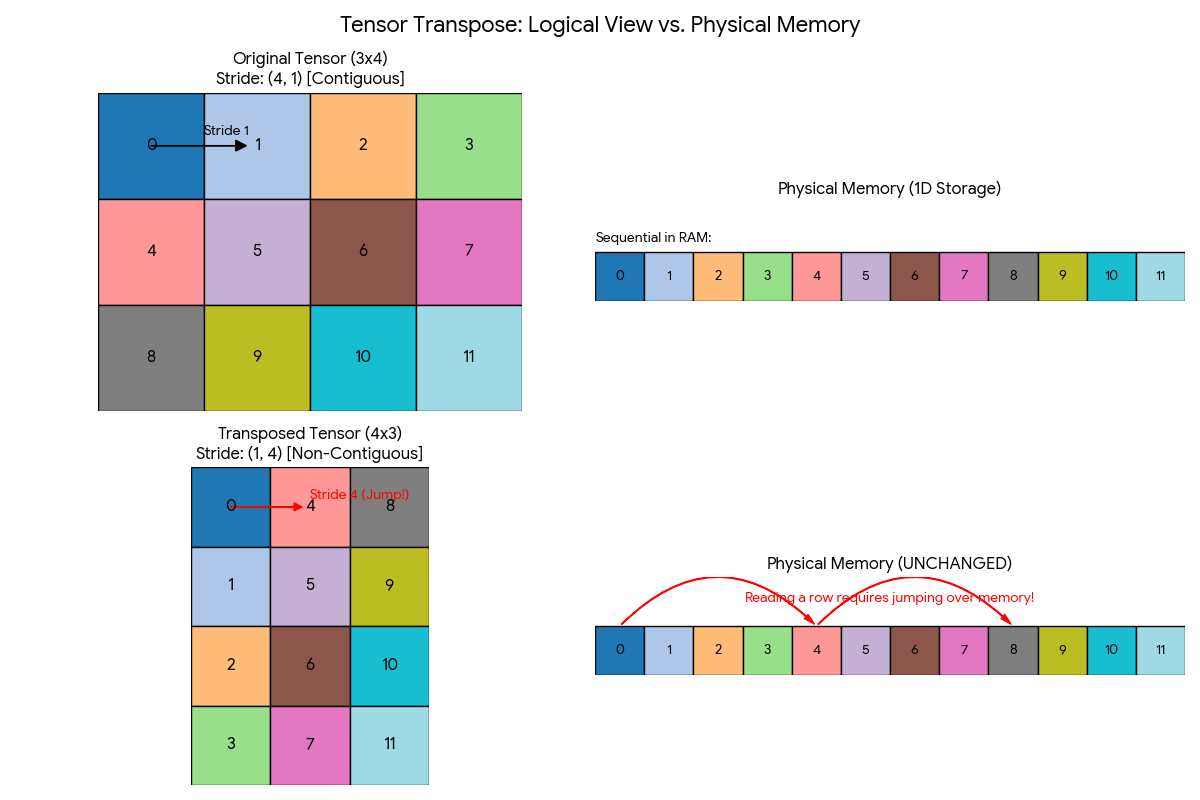

In [ ]:
# Create an original tensor
original_tensor = torch.tensor([[1, 2, 3],
                                [4, 5, 6]])
print("Original tensor:\n", original_tensor)
print("Is original_tensor contiguous?", [YOUR CODE])

# Transpose the tensor, which often makes it non-contiguous
transposed_tensor = [YOUR CODE]
print("\nTransposed tensor:\n", transposed_tensor)
print("Is transposed_tensor contiguous?", [YOUR CODE])

# --- Attempt to use view() on the non-contiguous tensor ---
print("\nAttempting view() on transposed_tensor (expecting error if non-contiguous):")
try:
    # use view() to convert to 3x2 tensor
    viewed_from_transposed = [YOUR CODE]
    print("Viewed from transposed:\n", viewed_from_transposed)
except RuntimeError as e:
    print(f"RuntimeError: {e}")


Original tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])
Is original_tensor contiguous? True

Transposed tensor:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])
Is transposed_tensor contiguous? False

Attempting view() on transposed_tensor (expecting error if non-contiguous):
Viewed from transposed:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])


### Why does `view()` work with non-contiguous tensor?

(3, 2) -> (3, 2), so no reshape at all.

In [ ]:
# let's try to use view() to reshape it to 2x3.

try:
    viewed_from_transposed = [YOUR CODE]
    print("Viewed from transposed:\n", viewed_from_transposed)
except RuntimeError as e:
    print(f"RuntimeError: {e}")

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.


### Use reshape() on the non-contiguous tensor


In [ ]:
print(transposed_tensor, transposed_tensor.is_contiguous())
print("\nUsing reshape() on transposed_tensor:")
# reshape to 2x3 tensor
reshaped_from_transposed = [YOUR CODE]
print("Reshaped from transposed:\n", reshaped_from_transposed)

# Modify the reshaped tensor
reshaped_from_transposed[0, 0] = 999
print("\nReshaped from transposed after modification:\n", reshaped_from_transposed)

# Check the original and transposed tensors again
print("\nOriginal tensor (should be unchanged):\n", original_tensor)
print("Transposed tensor (should be unchanged for actual data):\n", transposed_tensor)

tensor([[1, 4],
        [2, 5],
        [3, 6]]) False

Using reshape() on transposed_tensor:
Reshaped from transposed:
 tensor([[1, 4, 2],
        [5, 3, 6]])

Reshaped from transposed after modification:
 tensor([[999,   4,   2],
        [  5,   3,   6]])

Original tensor (should be unchanged):
 tensor([[1, 2, 3],
        [4, 5, 6]])
Transposed tensor (should be unchanged for actual data):
 tensor([[1, 4],
        [2, 5],
        [3, 6]])


### Matrix Multiplication: `@` is a syntactic sugar for `matmul()`

In [ ]:
tensor2d

tensor([[999,   2,   3],
        [  4,   5,   6]])

In [ ]:
# tensor2d multiply tensor2d.T
[YOUR CODE]

tensor([[998014,   4024],
        [  4024,     77]])

In [ ]:
# try use @ operator:
[YOUR CODE]

tensor([[998014,   4024],
        [  4024,     77]])

### what about `*` operator?

it is a piece-wise operation

In [ ]:
# try piece-wise multiplication of tensor2d with itself.

[YOUR CODE]

tensor([[998001,      4,      9],
        [    16,     25,     36]])

## pyTorch paradigm: Seeing models as computation graphs

That's how the backpropogation works using autodiff.

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/7.webp" width="600px">

In [ ]:
import torch.nn.functional as F # functional API for stateless operations.

y = torch.tensor([1.0])  # true label
x1 = torch.tensor([1.1]) # input feature
w1 = torch.tensor([2.2]) # weight parameter
b = torch.tensor([0.0])  # bias unit

z = [YOUR CODE]          # net input
a = [YOUR CODE]     # sigmoid activation & output

loss = [YOUR CODE] # binary classification loss function
print(loss)

tensor(0.0852)


## The backpropogation: Automatic differentiation made easy

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/8.webp" width="600px">

In [ ]:
import torch.nn.functional as F
from torch.autograd import grad

y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
# use requires_grad=True to make it trainable.
w1 = torch.tensor([2.2], [YOUR CODE])
b = torch.tensor([0.0], [YOUR CODE])

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)
# retain_graph: flag to control whether the computational graph will stay in memory after the backward pass completes.
# True: when need multiple backward passes over the same computational graph, e.g. calculating gradients for different parts.
# False: the default. the graph is destroyed after grad().
grad_L_w1 = grad(loss, w1, retain_graph=[YOUR CODE])
grad_L_b = grad(loss, b, retain_graph=[YOUR CODE])

print(grad_L_w1)
print(grad_L_b)

(tensor([-0.0898]),)
(tensor([-0.0817]),)


### That's tedious! `backward()`: more common way to compute gradient

In [ ]:
# starting from the loss value, call backward() directly to compute gradients:
[YOUR CODE]

# show gradients for w1 and b.
[YOUR CODE]

tensor([-0.0898])
tensor([-0.0817])


## A.5 Implementing multilayer neural networks

<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/9.webp" width="500px">

In [ ]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        # use sequential API to stack layers:
        self.layers = [YOUR CODE](

            # 1st hidden layer of 30 neurons and ReLU activation function
            [YOUR CODE]

            # 2nd hidden layer of 20 neurons and ReLU activation function
            [YOUR CODE]

            # output layer
            [YOUR CODE]
        )

    def forward(self, x):
        # push input x through all layers and get logits (raw output)
        logits = [YOUR CODE]
        return logits

In [ ]:
# now build an instance of network using 50 inputs and 3 outputs.
model = [YOUR CODE]

In [ ]:
# show the model architecture:

[YOUR CODE]

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)


### how many trainable parameters?

In [ ]:
# write code to find out how many trainable parameters:

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of trainable model parameters:", num_params)

Total number of trainable model parameters: 2213


### Can you calculate that manually?

### Trainable parameters use random initial values

In [ ]:
# show the initial weights of the first layer:

[YOUR CODE]

Parameter containing:
tensor([[ 0.1387,  0.0718,  0.0919,  ..., -0.0996,  0.0750, -0.0860],
        [ 0.0495,  0.0747,  0.1256,  ...,  0.0027,  0.1149, -0.0275],
        [ 0.0504,  0.1251, -0.1202,  ..., -0.0144, -0.0511, -0.0605],
        ...,
        [ 0.1345, -0.0210, -0.0482,  ..., -0.0845,  0.0176, -0.0714],
        [-0.0444, -0.0727, -0.1004,  ..., -0.1106, -0.0797, -0.0343],
        [ 0.1101,  0.1125,  0.1390,  ..., -0.1084,  0.1374,  0.0222]],
       requires_grad=True)


In [ ]:
# use a seed to make it repeatable
torch.manual_seed(123)

model = NeuralNetwork(50, 3)
print(model.layers[0].weight)

Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)


In [ ]:
# check the shape of the first layer weights:

[YOUR CODE]

torch.Size([30, 50])


### push data through the model (in training process)

In [ ]:
torch.manual_seed(123)

# create a 1x50 random tensor:
X = [YOUR CODE]
# call model(X), then forward() method is implicitly called.
out = [YOUR CODE]
print(out)

tensor([[-0.1262,  0.1080, -0.1792]], grad_fn=<AddmmBackward0>)


### push data through the model (in inference)

with the context of `torch.no_grad()`, since no training needed in inference.

In [ ]:
with [YOUR CODE]:
    out = [YOUR CODE]
print(out)

tensor([[-0.1262,  0.1080, -0.1792]])


### convert from arbitrary logits to probabilities

use `softmax`

In [ ]:
with torch.no_grad():
    out = [YOUR CODE]
print(out)

tensor([[0.3113, 0.3934, 0.2952]])


## `DataLoader` as an iterator that abstracts away the complexities of data management.


<img src="https://sebastianraschka.com/images/LLMs-from-scratch-images/appendix-a_compressed/10.webp" width="600px">

In [ ]:
# training set
X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

In [ ]:
# test set
X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

In [ ]:
# 3 interface you need to implement: __init__, __getitem__, __len__, so that the system knows how to load it.

from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = [YOUR CODE]
        one_y = [YOUR CODE]
        return one_x, one_y

    def __len__(self):
        return [YOUR CODE]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

In [ ]:
len(train_ds)

5

In [ ]:
from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

In [ ]:
test_ds = ToyDataset(X_test, y_test)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0
)

DataLoader is essentially an iterator, the loading process is optimized.

In [ ]:
# use enumerate to iterate through train_loader:

for idx, (x, y) in [YOUR CODE]:
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


Last batch is shorter, need to clean it up

In [ ]:
train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0,
    [YOUR CODE]
)

In [ ]:
for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)

Batch 1: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 2: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])


## A typical training loop

In [ ]:
import torch.nn.functional as F


torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)

num_epochs = 3

for epoch in range(num_epochs):

    # set the model to training mode (model.eval() for validation/testing mode)
    # This should be inside the epoch loop because:
    # 1. dropout layers
    # 2. batch normalization layers.
    # Typically, after each epoch of training, you want to evaluate your model
    # on a validation or test set to see how well it's generalizing. Before this
    # evaluation, you'd switch to model.eval(). Then, when you resume training
    # for the next epoch, you must switch back to model.train() to ensure these
    # layers are operating correctly for the learning phase.
    model.train()

    for batch_idx, (features, labels) in enumerate(train_loader):

        # the model specifies the number of features for a single input sample,
        # not the number of samples in a batch.
        # the model can take multiple input samples in one batch.
        logits = model(features)

        # why use the raw logits? because labels are NOT one-hot encoding,
        # and softmax is already built-in.
        # the key difference between cross_entropy and binary_cross_entropy.
        loss = F.cross_entropy(logits, labels) # Loss function

        # avoid accumulation of gradients and reset gradients for each batch.
        optimizer.zero_grad()

        # compute the current gradients.
        loss.backward()

        # use the current gradients to update the model's parameters
        # the optimizer keeps the reference to the parameters.
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

Epoch: 001/003 | Batch 000/002 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/002 | Train/Val Loss: 0.65
Epoch: 002/003 | Batch 000/002 | Train/Val Loss: 0.44
Epoch: 002/003 | Batch 001/002 | Train/Val Loss: 0.13
Epoch: 003/003 | Batch 000/002 | Train/Val Loss: 0.03
Epoch: 003/003 | Batch 001/002 | Train/Val Loss: 0.00


In [ ]:
# changes the behavior of specific layers, e.g. it tells dropout layer to stop
# and BatchNorm to use its learned running statistics instead of calculating
# them from the current mini-batch.
# It doesn't disable gradient computation.
model.eval()

# the context in which PyTorch will not build the computational graph,
# so no gradients will be calculated, even if the tensors have required_grad=True.
# it doesn't change the behavior of specific layers like Dropout or BatchNorm.
with torch.no_grad():
    outputs = model(X_train)

print(outputs)

tensor([[ 2.8569, -4.1618],
        [ 2.5382, -3.7548],
        [ 2.0944, -3.1820],
        [-1.4814,  1.4816],
        [-1.7176,  1.7342]])


In [ ]:
torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1)
print(probas)

predictions = torch.argmax(probas, dim=1)
print(predictions)

tensor([[0.9991, 0.0009],
        [0.9982, 0.0018],
        [0.9949, 0.0051],
        [0.0491, 0.9509],
        [0.0307, 0.9693]])
tensor([0, 0, 0, 1, 1])


In [ ]:
predictions = torch.argmax(outputs, dim=1)
print(predictions)

tensor([0, 0, 0, 1, 1])


In [ ]:
predictions == y_train

tensor([True, True, True, True, True])

In [ ]:
torch.sum(predictions == y_train)

tensor(5)

In [ ]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

In [ ]:
compute_accuracy(model, train_loader)

1.0

In [ ]:
compute_accuracy(model, test_loader)

1.0

## Saving and loading models

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
model = NeuralNetwork(2, 2) # needs to match the original model exactly
model.load_state_dict(torch.load("model.pth", weights_only=True))

<All keys matched successfully>